# Lab 09 - Data Mining - Andrew Badzioch

### What is Data Mining (DM)?
- According to IBM, data mining is the process of discovering and extracting valuable information from any dataset including large unstructured datasets.
- There are different techniques to perform DM:
    1. Machine Learning
    2. Descriptive Analysis
    3. Statistical Analysis
    4. Data Visualization

- DM can be performed using:
    1. one variable (univariate)
    2. two variables (bivariate)
    3. more than two variables (multivariate)

### Steps in Preforming DM:
1. Introduction (Background, Objectives, Data Description)
2. Import libraries
3. Load (read) the dataset
4. EDA:
    - Baisc data exploration (data attributes, info, data summary, missing values)
    - Handiling missing values
    - Getting unique values in each variable
    - Adding and deleting columns (variable): data engineering
    - Checking outliers and treating them
5. Data Visualization
6. Data Mining
7. Data reporting (presentation)

#### 2. Importing Libraries

In [1]:
# general libraries
import numpy as np
import pandas as pd
import math 

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# suppression libraries
import warnings
warnings.filterwarnings('ignore')

### 3. Loading the dataset

In [2]:
df1 = pd.read_csv('movie.csv')
df2 = pd.read_csv('ratings.csv')
df3 = pd.read_csv('user.csv')

In [3]:
movie = df1.copy()
ratings = df2.copy()
user = df3.copy()

### 4. EDA

In [4]:
print("shape: ", movie.shape)
print("size: ", movie.size)
print("ndim: ", movie.ndim)
print("columns: ", movie.columns)

shape:  (1680, 21)
size:  35280
ndim:  2
columns:  Index(['movie id', 'movie title', 'release date', 'Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')


In [5]:
# attributes
movie.shape

(1680, 21)

In [6]:
movie.size

35280

In [7]:
movie.ndim

2

In [8]:
movie.columns

Index(['movie id', 'movie title', 'release date', 'Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [9]:
movie.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,1-Jan-95,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,1-Jan-95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,1-Jan-95,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,1-Jan-95,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
ratings.shape

(100000, 4)

In [11]:
ratings.size

400000

In [12]:
ratings.columns

Index(['user id', 'movie id', 'rating', 'timestamp'], dtype='object')

In [13]:
ratings.ndim

2

In [14]:
ratings.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [15]:
user.shape

(943, 5)

In [16]:
user.size

4715

In [17]:
user.columns

Index(['user id', 'age', 'gender', 'occupation', 'zip code'], dtype='object')

In [18]:
user.ndim

2

In [19]:
user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [20]:
# let's see the informaiton about movie
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1680 non-null   int64 
 1   movie title   1680 non-null   object
 2   release date  1680 non-null   object
 3   Action        1680 non-null   int64 
 4   Adventure     1680 non-null   int64 
 5   Animation     1680 non-null   int64 
 6   Childrens     1680 non-null   int64 
 7   Comedy        1680 non-null   int64 
 8   Crime         1680 non-null   int64 
 9   Documentary   1680 non-null   int64 
 10  Drama         1680 non-null   int64 
 11  Fantasy       1680 non-null   int64 
 12  Film-Noir     1680 non-null   int64 
 13  Horror        1680 non-null   int64 
 14  Musical       1680 non-null   int64 
 15  Mystery       1680 non-null   int64 
 16  Romance       1680 non-null   int64 
 17  Sci-Fi        1680 non-null   int64 
 18  Thriller      1680 non-null   int64 
 19  War   

In [21]:
# checking null values
movie.isnull().sum()

movie id        0
movie title     0
release date    0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [22]:
# statistical numerical summary
movie.describe().T

,count,mean,std,min,25%,50%,75%,max
movie id,1680.0,841.525595,485.609591,1.0,421.75,841.5,1261.25,1682.0
Action,1680.0,0.149405,0.356593,0.0,0.00,0.0,0.00,1.0
Adventure,1680.0,0.080357,0.271926,0.0,0.00,0.0,0.00,1.0
Animation,1680.0,0.025000,0.156171,0.0,0.00,0.0,0.00,1.0
Childrens,1680.0,0.072619,0.259587,0.0,0.00,0.0,0.00,1.0
Comedy,1680.0,0.300595,0.458653,0.0,0.00,0.0,1.00,1.0
Crime,1680.0,0.064881,0.246389,0.0,0.00,0.0,0.00,1.0
Documentary,1680.0,0.029762,0.169980,0.0,0.00,0.0,0.00,1.0
Drama,1680.0,0.431548,0.495440,0.0,0.00,0.0,1.00,1.0
Fantasy,1680.0,0.013095,0.113717,0.0,0.00,0.0,0.00,1.0


In [23]:
movie.describe(include=object).T

,count,unique,top,freq
movie title,1680,1657,That Darn Cat!,3
release date,1680,239,1-Jan-95,215


In [24]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [25]:
ratings.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [26]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
user id,100000.0,4.624848e+02,2.666144e+02,1.0,254.0,447.0,682.0,943.0
movie id,100000.0,4.255301e+02,3.307984e+02,1.0,175.0,322.0,631.0,1682.0
rating,100000.0,3.529860e+00,1.125674e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100000.0,8.835289e+08,5.343856e+06,874724710.0,879448709.5,882826944.0,888259984.0,893286638.0


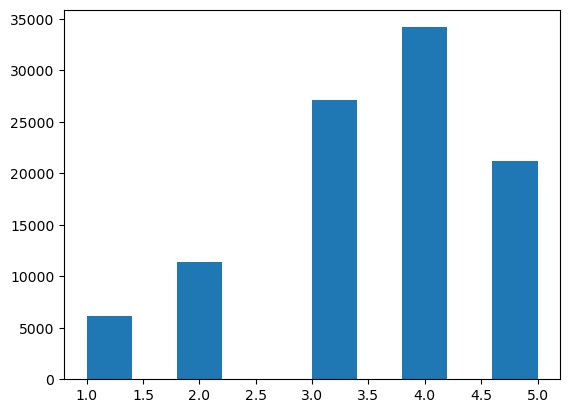

In [27]:
# let's see the data distribution in the rating variable
plt.hist(ratings['rating']);
# this is left skewed

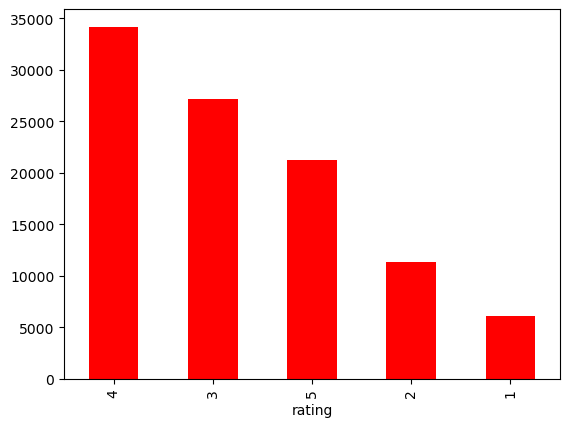

In [28]:
# FINAL EXAM 
ratings['rating'].value_counts().plot(kind='bar', color='red');

In [29]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [30]:
user.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

In [31]:
user.describe().T

,count,mean,std,min,25%,50%,75%,max
user id,943.0,472.000000,272.364951,1.0,236.5,472.0,707.5,943.0
age,943.0,34.051962,12.192740,7.0,25.0,31.0,43.0,73.0


In [32]:
user.describe(include=object).T

,count,unique,top,freq
gender,943,2,M,670
occupation,943,21,student,196
zip code,943,795,55414,9


In [33]:
user['gender'].value_counts()

gender
M    670
F    273
Name: count, dtype: int64

<Axes: xlabel='gender'>

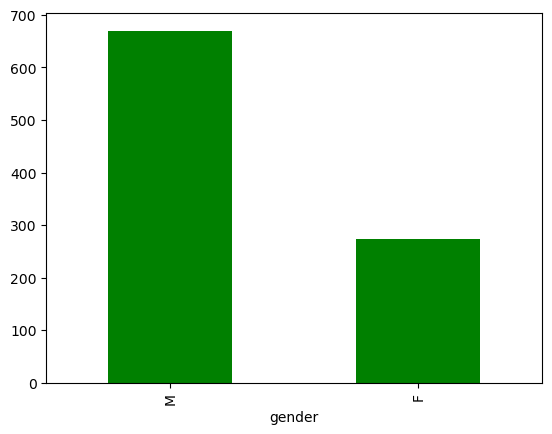

In [34]:
user['gender'].value_counts().plot(kind='bar', color='green')

#### Summary of the EDA for all 3 datasets:
- 15 points here about the 3 datasets

### 6. Data Mining Questions:

1. How many movies are there per each genre?
2. What are the top ten genres (more movies per genre)?
3. What are the movies that have more than 3 genres?
4. What are the top 25 movies with highest rating and highest number of reviews?
5. What is the relationship between the user gender and movies' genre?

#### 1. How many movies are there per each genre?

In [35]:
movie.columns

Index(['movie id', 'movie title', 'release date', 'Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [36]:
# 1. How many movies are there per each genre?
# since we are indexing more than one variable, we need to use double square brackets to enclose all the valiables
movie[['Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western']].sum()

Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

In [37]:
# the shorter way to answer number 1
# if we wnat to list the values in ascending order, use ascending=True
# if we wnat to list the values in descending order, use ascending=False
movie.loc[:,'Action':'Western'].sum().sort_values(ascending=False)

Drama          725
Comedy         505
Action         251
Thriller       251
Romance        247
Adventure      135
Childrens      122
Crime          109
Sci-Fi         101
Horror          92
War             71
Mystery         61
Musical         56
Documentary     50
Animation       42
Western         27
Film-Noir       24
Fantasy         22
dtype: int64

#### 2. What are the top ten genres (more movies per genre)?

In [38]:
genre = movie.loc[:,'Action':'Western'].sum().sort_values(ascending=False)

In [39]:
# let's see the top 7 genre with highest number of movies
genre.head(10)

Drama        725
Comedy       505
Action       251
Thriller     251
Romance      247
Adventure    135
Childrens    122
Crime        109
Sci-Fi       101
Horror        92
dtype: int64

####  3. how many movies have more than 3 genres?
1. a new df will be created that we name genre_movie and it will have the 2 columns from the movie dataset: movie id and movie title
2. we need to create a column that gives us the total number of genres per movie.
3. we need to index only the movies that have more than 3 genres.
4. we add the new column to this dataset.

In [40]:
# first step: creating the new df
genre_movie = movie[['movie id', 'movie title']]
genre_movie.head()


,movie id,movie title
0,1,Toy Story
1,2,GoldenEye
2,3,Four Rooms
3,4,Get Shorty
4,5,Copycat


In [41]:
# get the shape of the new dataset
genre_movie.shape

(1680, 2)

In [42]:
# find the type
type(genre_movie)

pandas.core.frame.DataFrame

In [43]:
# step 2. creating a new column that is named 'num of genres'
genre_movie['num of genres'] = movie.loc[:,'Action':'Western'].sum(axis=1)
genre_movie.head()

,movie id,movie title,num of genres
0,1,Toy Story,3
1,2,GoldenEye,3
2,3,Four Rooms,1
3,4,Get Shorty,3
4,5,Copycat,3


In [44]:
# can i see the number of the movies along with their number of genres?
genre_movie['num of genres'].value_counts()

num of genres
1    831
2    569
3    215
4     51
5     11
6      3
Name: count, dtype: int64

In [45]:
# last step to see the number of movies with more than 3 genres
genre_movie[genre_movie['num of genres'] > 3].value_counts().sum()

65

In [46]:
genre_count = genre_movie[genre_movie['num of genres'] > 3]

<Axes: xlabel='num of genres'>

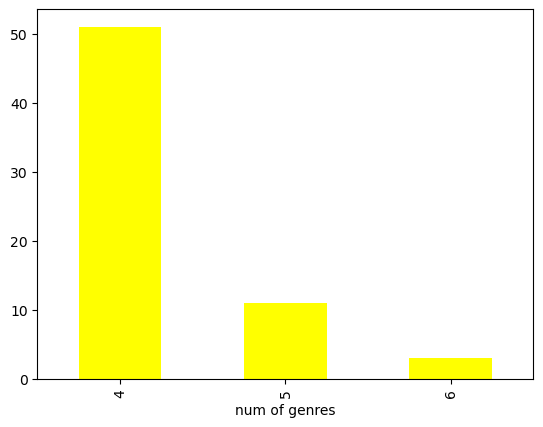

In [47]:
genre_count['num of genres'].value_counts().plot(kind='bar', color='yellow')

#### 4. What are the top 25 highest rated movies that have 100 or more reviews?
1. merging the 2 datasets: movie and ratings
2. groupby the 2 columns of movie title and rating and getting movies with more than 100 reviews: store the output in a variable
3. getting the average of the reviews for each movie: store the output in a variable
4. checking whether the movies in the 100 or more reviews are in the average variable

In [48]:
movie.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,1-Jan-95,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,1-Jan-95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,1-Jan-95,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,1-Jan-95,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [49]:
ratings.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [50]:
movie.shape

(1680, 21)

In [51]:
ratings.shape

(100000, 4)

In [52]:
# step 1. merging the 2 datasets
merged_df = movie.merge(ratings, on='movie id')

In [53]:
merged_df.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user id,rating,timestamp
0,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,308,4,887736532
1,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,287,5,875334088
2,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,148,4,877019411
3,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,280,4,891700426
4,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,66,3,883601324


In [54]:
merged_df.shape

(99990, 24)

In [55]:
# check to see if there are any duplicated value (row) 
movie[movie.duplicated()].count()

movie id        0
movie title     0
release date    0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [56]:
ratings[ratings.duplicated()].sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [57]:
# step 2: getting the movies with 100 or more reviews (using groupby() method)
# since the rating is numeric variable and we perform aggregation on it, it will be listed as the second variable in the method
merged_df.groupby(['movie title'])['rating'].count()

movie title
'Til There Was You                   9
1-900                                5
101 Dalmatians                     109
12 Angry Men                       125
187                                 41
                                  ... 
Young Guns                         101
Young Guns II                       44
Young Poisoner's Handbook, The      41
Zeus and Roxanne                     6
Á köldum klaka (Cold Fever)          1
Name: rating, Length: 1657, dtype: int64

In [58]:
merged_df.groupby(['movie title'])['rating'].count().reset_index()

,movie title,rating
0,'Til There Was You,9
1,1-900,5
2,101 Dalmatians,109
3,12 Angry Men,125
4,187,41
...,...,...
1652,Young Guns,101
1653,Young Guns II,44
1654,"Young Poisoner's Handbook, The",41
1655,Zeus and Roxanne,6


In [59]:
# store the output in a variable and call it rating_count
rating_count = merged_df.groupby(['movie title'])['rating'].count().reset_index()

In [60]:
# get only the movies with 100 or more reviews
rating_count[rating_count['rating'] >= 100]['movie title']

2                              101 Dalmatians 
3                                12 Angry Men 
7                       2001: A Space Odyssey 
15                             Absolute Power 
16                                 Abyss, The 
                         ...                  
1627    Willy Wonka and the Chocolate Factory 
1638                        Wizard of Oz, The 
1646                      Wrong Trousers, The 
1651                       Young Frankenstein 
1652                               Young Guns 
Name: movie title, Length: 338, dtype: object

In [61]:
# store the movies with 100 or more
movie_100_ratings = rating_count[rating_count['rating'] >= 100]['movie title']

In [62]:
# get the average of the ratings for each movie
merged_df.groupby(['movie title'])['rating'].mean()

movie title
'Til There Was You                 2.333333
1-900                              2.600000
101 Dalmatians                     2.908257
12 Angry Men                       4.344000
187                                3.024390
                                     ...   
Young Guns                         3.207921
Young Guns II                      2.772727
Young Poisoner's Handbook, The     3.341463
Zeus and Roxanne                   2.166667
Á köldum klaka (Cold Fever)        3.000000
Name: rating, Length: 1657, dtype: float64

In [63]:
merged_df.groupby(['movie title'])['rating'].mean().sort_values(ascending=False).reset_index()

,movie title,rating
0,"Great Day in Harlem, A",5.0
1,Prefontaine,5.0
2,Someone Else's America,5.0
3,Entertaining Angels: The Dorothy Day Story,5.0
4,Marlene Dietrich: Shadow and Light (,5.0
...,...,...
1652,Babyfever,1.0
1653,Lashou shentan,1.0
1654,Shadows (Cienie),1.0
1655,Shadow of Angels (Schatten der Engel),1.0


In [64]:
# store the output in average_rating
avg_rating = merged_df.groupby(['movie title'])['rating'].mean().sort_values(ascending=False).reset_index()

In [65]:
# find out if the movies in the avg_rating are in the movie_100_ratings
avg_rating[avg_rating['movie title'].isin(movie_100_ratings)]

,movie title,rating
15,"Close Shave, A",4.491071
16,Schindler's List,4.466443
17,"Wrong Trousers, The",4.466102
18,Casablanca,4.456790
20,"Shawshank Redemption, The",4.445230
...,...,...
1261,Spawn,2.615385
1277,Event Horizon,2.574803
1291,Crash,2.546875
1357,Jungle2Jungle,2.439394


In [66]:
avg_rating[avg_rating['movie title'].isin(movie_100_ratings)].head(25)

,movie title,rating
15,"Close Shave, A",4.491071
16,Schindler's List,4.466443
17,"Wrong Trousers, The",4.466102
18,Casablanca,4.456790
20,"Shawshank Redemption, The",4.445230
21,Rear Window,4.387560
22,"Usual Suspects, The",4.385768
23,Star Wars,4.358491
24,12 Angry Men,4.344000
28,Citizen Kane,4.292929


#### 5. What is the relationship between the user gender and movies' genre?
1. merging all datasets: merged_df and user
2. groupby() the 2 columns of gerder and all the genres

In [67]:
user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [68]:
merged_df.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user id,rating,timestamp
0,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,308,4,887736532
1,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,287,5,875334088
2,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,148,4,877019411
3,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,280,4,891700426
4,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,66,3,883601324


In [69]:
# merge all datasets
all_data = merged_df.merge(user, on='user id')
all_data.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Thriller,War,Western,user id,rating,timestamp,age,gender,occupation,zip code
0,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,308,4,887736532,60,M,retired,95076
1,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,287,5,875334088,21,M,salesman,31211
2,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,148,4,877019411,33,M,engineer,97006
3,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,280,4,891700426,30,F,librarian,22903
4,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,66,3,883601324,23,M,student,80521


In [70]:
all_data.groupby('gender').sum().loc[:, 'Action':'Western']

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
gender,,,,,,,,,,,,,,,,,,
F,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371
M,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483


In [71]:
# store the output in genre_by_gender
genre_by_gender = all_data.groupby('gender').sum().loc[:, 'Action':'Western']

In [72]:
print(genre_by_gender)

        Action  Adventure  Animation  Childrens  Comedy  Crime  Documentary  \
gender                                                                        
F         5442       3141        995       2232    8068   1794          187   
M        20147      10612       2610       4950   21764   6261          571   

        Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  \
gender                                                                         
F       11008      363        385    1197     1442     1314     5858    2629   
M       28887      989       1348    4120     3512     3931    13603   10101   

        Thriller   War  Western  
gender                           
F           5086  2189      371  
M          16786  7209     1483  


### Conclusion:30

##### End of Lab 09